In [20]:
#imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random


In [21]:
#run detect on images in folder
#folderPath = "C:\\Users\\viers\\OneDrive\\Bureaublad\\ResearchProject\\researchproject\\FaceDetectionYolo\\yolov7\\data\\test"
folderPath = "C:\\Users\\viers\\OneDrive\\Bureaublad\\ResearchProject\\researchproject\\FaceNet\\data\\Images\\"
conf = 0.4
weights = "runs/train/yolov7-custom23/weights/best.pt"

%cd yolov7
!python detect.py --weights {weights} --img-size 256 --conf {conf} --save-txt --source {folderPath}




[WinError 2] The system cannot find the file specified: 'yolov7'
c:\Users\viers\OneDrive\Bureaublad\ResearchProject\researchproject\FaceDetectionYolo\yolov7
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=256, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=True, source='C:\\Users\\viers\\OneDrive\\Bureaublad\\ResearchProject\\researchproject\\FaceNet\\data\\Images\\', update=False, view_img=False, weights=['runs/train/yolov7-custom23/weights/best.pt'])
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

1 face, Done. (133.0ms) Inference, (6.0ms) NMS
 The image with the result is saved in: runs\detect\exp17\1.jpg
Done. (120.0ms) Inference, (0.0ms) NMS
 The image with the result is saved in: runs\detect\exp17\10.jpg
1 face, Done. (204.0ms) 

YOLOR  5bef919 torch 1.7.0+cu101 CUDA:0 (GeForce GTX 1650 with Max-Q Design, 4096.0MB)

Model Summary: 306 layers, 36479926 parameters, 6194944 gradients, 103.2 GFLOPS


In [22]:
DetectPath = "C:\\Users\\viers\\OneDrive\\Bureaublad\\ResearchProject\\researchproject\\FaceDetectionYolo\\yolov7\\runs\\detect\\"
expFolders = os.listdir(DetectPath)

expFoldersVersions = []
for exp in expFolders:
    exp = exp.split("exp")[1]
    if exp == "":
        exp = 0
    expFoldersVersions.append(int(exp))

latestVersion = max(expFoldersVersions)
latestVersionPath = DetectPath + "exp" + str(latestVersion) + "\\"
print(latestVersionPath)
    


    

C:\Users\viers\OneDrive\Bureaublad\ResearchProject\researchproject\FaceDetectionYolo\yolov7\runs\detect\exp17\


In [23]:
Images = []
Coords = []
DetectedImageNames = []
UndetectedImages = []
croppedFacePath = "C:\\Users\\viers\\OneDrive\\Bureaublad\\ResearchProject\\researchproject\\FaceDetectionYolo\\data\\autoprocess\\croppedFaces\\"
UndetectedImagesPath = "C:\\Users\\viers\\OneDrive\\Bureaublad\\ResearchProject\\researchproject\\FaceDetectionYolo\\data\\autoprocess\\undetectedFaces\\"

#create path if not exists
if not os.path.exists(croppedFacePath):
    os.makedirs(croppedFacePath)
if not os.path.exists(UndetectedImagesPath):
    os.makedirs(UndetectedImagesPath)


labelsPath = latestVersionPath + "labels\\"
for label in os.listdir(labelsPath):
    with open(labelsPath + label, "r") as f:
        lines = f.readlines()
    if len(lines) == 0:
        break
    for line in lines:
        line = line.split(" ")
        if line[0] == "0":
            DetectedImageNames.append(label.split(".txt")[0] + ".jpg")
            Images.append(latestVersionPath+label.split(".txt")[0] + ".jpg")
            Coords.append(line[1:])

print(Images[0], Coords[0])

#locate undetected images to manually process
for img in os.listdir(folderPath):
    if img not in DetectedImageNames:
        UndetectedImages.append(img)

print(f"length of detected images: {len(DetectedImageNames)}")
print(f"length of undetected images: {len(UndetectedImages)}")

print(UndetectedImages[:5])
print(DetectedImageNames[:5])

for i in range(len(UndetectedImages)):
    cv2.imwrite(UndetectedImagesPath + UndetectedImages[i], cv2.imread(folderPath + "\\" + UndetectedImages[i]))




C:\Users\viers\OneDrive\Bureaublad\ResearchProject\researchproject\FaceDetectionYolo\yolov7\runs\detect\exp17\1.jpg ['0.51216', '0.42072', '0.343385', '0.244163\n']
length of detected images: 221
length of undetected images: 23
['10.jpg', '105.jpg', '128.jpg', '131.jpg', '144.jpg']
['1.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg']


In [24]:
#draw boxes on images

imgSize = 512
faces = []
def convertYoloCoordsToBounding(coords,imgSize):
    x = float(coords[0])
    y = float(coords[1])
    w = float(coords[2])
    h = float(coords[3])
    x1 = int((x-w/2)*imgSize)
    y1 = int((y-h/2)*imgSize)
    x2 = int((x+w/2)*imgSize)
    y2 = int((y+h/2)*imgSize)
    return [x1, y1, x2, y2]

def cropFace(img, coords):
    x1, y1, x2, y2 = coords
    return img[y1:y2, x1:x2]



for i in range(len(Images)):
    img = cv2.imread(Images[i])
    img = cv2.resize(img, (imgSize, imgSize)) 
    img = cropFace(img, convertYoloCoordsToBounding(Coords[i], imgSize))
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))
    cv2.imwrite(croppedFacePath + DetectedImageNames[i], img)
    faces.append(img)




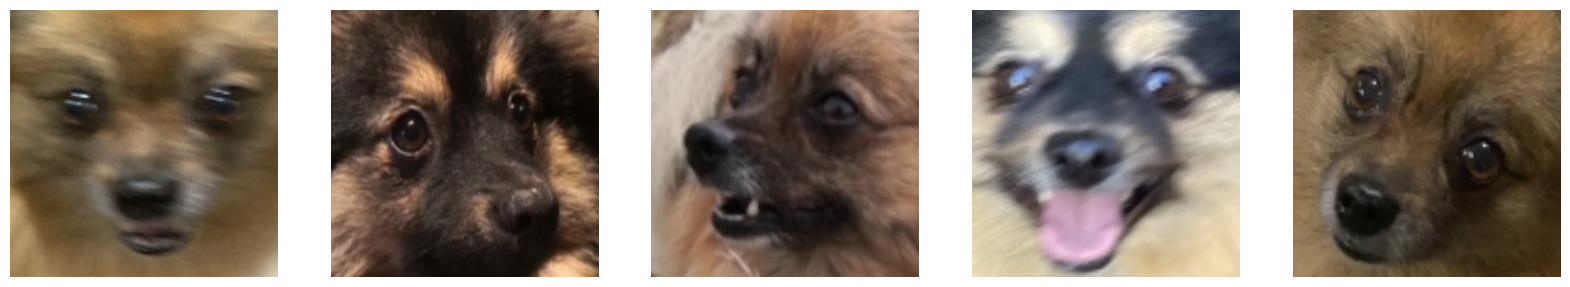

In [25]:
#show some faces on same axis
fig, axs = plt.subplots(1,5, figsize=(20, 20))
for i in range(5):
    x = random.randint(0, len(faces))
    img = cv2.cvtColor(faces[x], cv2.COLOR_BGR2RGB)
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()


In [26]:
print(f"images to manually process: {UndetectedImages}")

images to manually process: ['10.jpg', '105.jpg', '128.jpg', '131.jpg', '144.jpg', '154.jpg', '155.jpg', '159.jpg', '160.jpg', '163.jpg', '164.jpg', '189.jpg', '197.jpg', '207.jpg', '208.jpg', '21.jpg', '25.jpg', '27.jpg', '40.jpg', '5.jpg', '50.jpg', '85.jpg', '9.jpg']
